<a href="https://colab.research.google.com/github/chen-qian-dan/QC_Flooring/blob/master/QC_FlooringBaby.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prepare

In [0]:
# Every notebook starts with the following 3 lines; 
# They ensure that any edits to libraries you make are reloaded here automatically, 
# and also that any charts or images displayed are shown in this notebook. 
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## Import libraries

In [0]:
# import libraries
#--------------------------------
from fastai.vision import *      # for modeling
from google.colab import drive   # for data accessing

# for data visualization
import seaborn as sns            
from matplotlib.pyplot import figure 

from fastai import *
from fastai.metrics import error_rate
from pathlib import Path
#--------------------------------

## Data
Fastai requires the images not to be in separate folders, but rather in one single folder, labeled as CSV File. 

In [0]:
# mount google drive to my Colab session
drive.mount("/content/drive", force_remount = True)
rootDir = "/content/drive"
baseDir = rootDir + "/My Drive/QC_Fellowship.ai"

Mounted at /content/drive


In [0]:
# create path variables for folder containing images
path = Path(baseDir + "/QC_TestDataSet")

In [0]:
path.ls() # make sure this shows image folders

[PosixPath('/content/drive/My Drive/QC_Fellowship.ai/QC_TestDataSet/damaged_10.jpg'),
 PosixPath('/content/drive/My Drive/QC_Fellowship.ai/QC_TestDataSet/damaged_9.jpg'),
 PosixPath('/content/drive/My Drive/QC_Fellowship.ai/QC_TestDataSet/damaged_2.jpg'),
 PosixPath('/content/drive/My Drive/QC_Fellowship.ai/QC_TestDataSet/Normal_2.jpg'),
 PosixPath('/content/drive/My Drive/QC_Fellowship.ai/QC_TestDataSet/Normal_8.jpg'),
 PosixPath('/content/drive/My Drive/QC_Fellowship.ai/QC_TestDataSet/damaged_8.jpg'),
 PosixPath('/content/drive/My Drive/QC_Fellowship.ai/QC_TestDataSet/Normal_9.jpg'),
 PosixPath('/content/drive/My Drive/QC_Fellowship.ai/QC_TestDataSet/damaged_7.jpg'),
 PosixPath('/content/drive/My Drive/QC_Fellowship.ai/QC_TestDataSet/damaged_4.jpg'),
 PosixPath('/content/drive/My Drive/QC_Fellowship.ai/QC_TestDataSet/Normal_10.jpg'),
 PosixPath('/content/drive/My Drive/QC_Fellowship.ai/QC_TestDataSet/Normal_7.jpg'),
 PosixPath('/content/drive/My Drive/QC_Fellowship.ai/QC_TestDataSet/

In [0]:
fnames = get_image_files(path)

In [0]:
fnames[:5]

[PosixPath('/content/drive/My Drive/QC_Fellowship.ai/QC_TestDataSet/damaged_10.jpg'),
 PosixPath('/content/drive/My Drive/QC_Fellowship.ai/QC_TestDataSet/damaged_9.jpg'),
 PosixPath('/content/drive/My Drive/QC_Fellowship.ai/QC_TestDataSet/damaged_2.jpg'),
 PosixPath('/content/drive/My Drive/QC_Fellowship.ai/QC_TestDataSet/Normal_2.jpg'),
 PosixPath('/content/drive/My Drive/QC_Fellowship.ai/QC_TestDataSet/Normal_8.jpg')]

In [0]:
# load data
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [0]:
bs = 16

In [0]:
data = ImageDataBunch.from_name_re(path, 
                                   fnames, 
                                   pat, 
                                   ds_tfms=get_transforms(), 
                                   size=224, 
                                   bs=bs
                                   ).normalize(imagenet_stats)

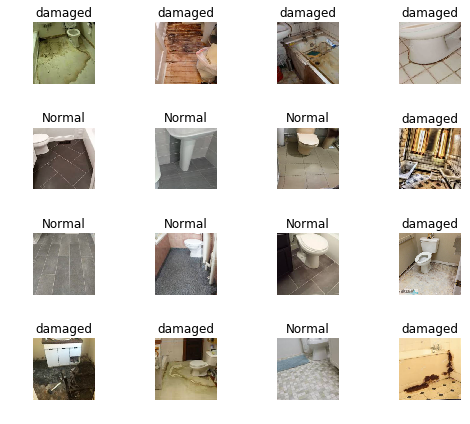

In [0]:
data.show_batch(row=5, figsize = (7, 6))

In [0]:
print(data.classes)

['Normal', 'damaged']


In [0]:
len(data.classes)

2

In [0]:
data.c

2

In [0]:
help(data.show_batch)

Help on method show_batch in module fastai.basic_data:

show_batch(rows:int=5, ds_type:fastai.basic_data.DatasetType=<DatasetType.Train: 1>, reverse:bool=False, **kwargs) -> None method of fastai.vision.data.ImageDataBunch instance
    Show a batch of data in `ds_type` on a few `rows`.



## Training
### resnet34

Now, we will start training our model. 

We use a Convolutional Neural Network backbone and a fully connected head with a single hidden layer as a classifier. 

We are building a model which will take images as input and willl output the predicted probability for each of the categories. 

We will train for 4 epochs (4 cycles through all our data). 


In [0]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 113045797.18it/s]


In [0]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.040294,0.721648,0.500000,00:07
1,1.161378,0.466788,0.250000,00:07
2,0.840872,0.322185,0.250000,00:06
3,0.655992,0.288436,0.250000,00:06


In [0]:
learn.save('stage-1')

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


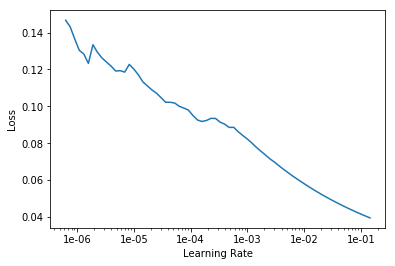

In [0]:
learn.recorder.plot()

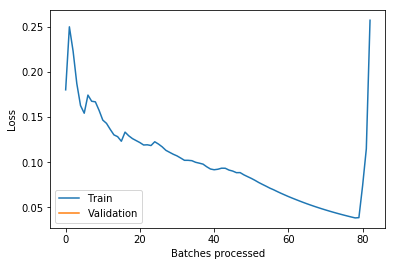

In [0]:
learn.recorder.plot_losses()

## Results

We will first see which were the categories that the model most confused with one another. 

We will try to see if what the model predicted was reasonable or not. 

This is an indicator that our classifier is working correctly. 

Furthermore, when we plot the confusion matrix, we can see that the distribution is heavily skewed: the model makes the same mistakes over and over again but it rarely confuses other categoies. 

This suggests that it just finds it difficult to distinguish some specific categories between each other; This is normal behaviour. 

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses()
len(data.valid_ds) == len(losses) == len(idxs)

True

3 misclassified samples over 4 samples in the validation set.


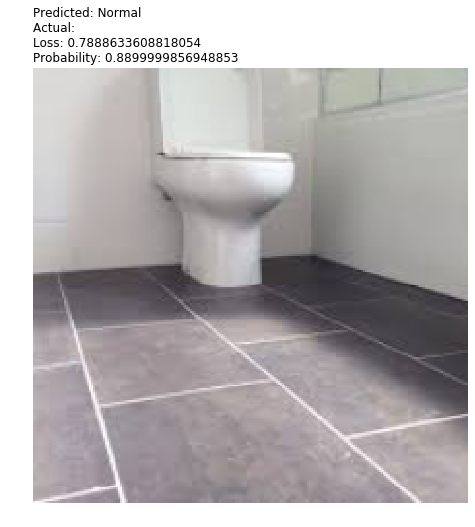

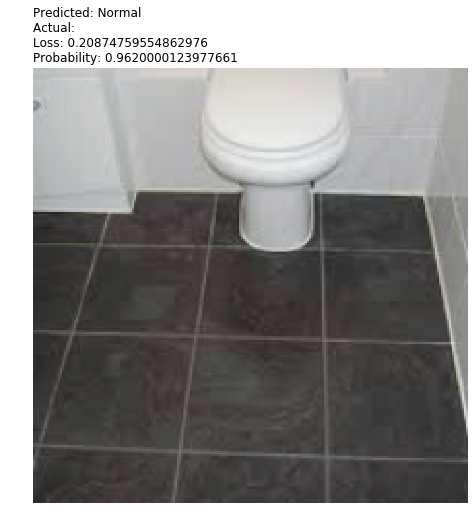

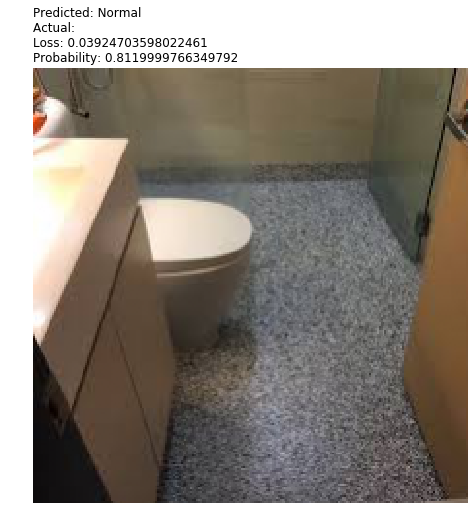

In [0]:
interp.plot_multi_top_losses(samples = 20)